In [1]:
# ref: https://www.analyticsvidhya.com/blog/2017/06/a-comprehensive-guide-for-linear-ridge-and-lasso-regression/

In [2]:

# importing basic libraries

import numpy as np

import pandas as pd

from pandas import Series, DataFrame
import matplotlib.pyplot as plt

%matplotlib inline
from sklearn.model_selection import train_test_split

#import test and train file

train = pd.read_csv('data/Train_bigmart.csv')

test = pd.read_csv('data/test_bigmart.csv')

# importing linear regressionfrom sklearn

from sklearn.linear_model import LinearRegression

lreg = LinearRegression()

#splitting into training and cv for cross validation

X = train.loc[:,['Outlet_Establishment_Year','Item_MRP']]

x_train, x_cv, y_train, y_cv = train_test_split(X,train.Item_Outlet_Sales)

#training the model

lreg.fit(x_train,y_train)

#predicting on cv

pred = lreg.predict(x_cv)

#calculating mse

mse = np.mean((pred - y_cv)**2)

print ("mse is", mse)

#In this case, we got mse = 19,10,586.53, which is much smaller than our model 2. Therefore predicting with the help of two features is much more accurate.

#Let us take a look at the coefficients of this linear regression model.

# calculating coefficients

coeff = DataFrame(x_train.columns)

coeff['Coefficient Estimate'] = Series(lreg.coef_)

coeff



mse is 1955221.0062548993


,0,Coefficient Estimate
0,Outlet_Establishment_Year,-10.476025
1,Item_MRP,15.515530


In [3]:
#  MRP has a high coefficient, meaning items having higher prices have better sales.

In [4]:
lreg.score(x_cv,y_cv)

0.3335088162907154

In [5]:
# R-squared error
# so 32% variablity, only 32% of variance in sales is explained by year of establishment and MRP. 
# In other words, if you know year of establishment and the MRP, you’ll have 32% information to make an accurate prediction about its sales.

In [6]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
train['Item_Weight'].fillna(np.mean(train['Item_Weight']), inplace = True)
train.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [9]:
train['Outlet_Size'].fillna('small', inplace = True)
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [10]:
train.loc[train.loc[:,'Item_Visibility']==0,:].info()
# there are rows where item visiblit is zero impute with mean

<class 'pandas.core.frame.DataFrame'>
Int64Index: 526 entries, 3 to 8500
Data columns (total 12 columns):
Item_Identifier              526 non-null object
Item_Weight                  526 non-null float64
Item_Fat_Content             526 non-null object
Item_Visibility              526 non-null float64
Item_Type                    526 non-null object
Item_MRP                     526 non-null float64
Outlet_Identifier            526 non-null object
Outlet_Establishment_Year    526 non-null int64
Outlet_Size                  526 non-null object
Outlet_Location_Type         526 non-null object
Outlet_Type                  526 non-null object
Item_Outlet_Sales            526 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 53.4+ KB


In [11]:
train.loc[train.loc[:,'Item_Visibility']==0, 'Item_Visibility'] = [np.mean(train.loc[:,'Item_Visibility'])]

In [12]:
train.loc[:,'Item_Visibility'] = train.loc[:,'Item_Visibility'].replace(0, np.mean(train.loc[:,'Item_Visibility']))

In [13]:
train['Outlet_Establishment_Year'] = 2013 - train['Outlet_Establishment_Year']



In [14]:
mylist = list(train.select_dtypes(include=['object']).columns)

In [15]:
dummies = pd.get_dummies(train[mylist], prefix = mylist)
dummies.head()

,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,Item_Identifier_DRB25,Item_Identifier_DRB48,Item_Identifier_DRC01,Item_Identifier_DRC12,...,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Size_small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [16]:
train.drop(mylist, axis = 1, inplace= True)
train.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,14,3735.1380
1,5.92,0.019278,48.2692,4,443.4228
2,17.50,0.016760,141.6180,14,2097.2700
3,19.20,0.066132,182.0950,15,732.3800
4,8.93,0.066132,53.8614,26,994.7052


In [17]:
train = pd.concat([train, dummies], axis=1)
train.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,...,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Size_small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,14,3735.1380,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,4,443.4228,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,14,2097.2700,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
3,19.20,0.066132,182.0950,15,732.3800,0,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
4,8.93,0.066132,53.8614,26,994.7052,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [18]:


# importing linear regression

from sklearn.linear_model import LinearRegression

lreg = LinearRegression()

# for cross validation

from sklearn.model_selection import train_test_split

X = train.drop('Item_Outlet_Sales',1)

x_train, x_cv, y_train, y_cv = train_test_split(X,train.Item_Outlet_Sales, test_size =0.3)

# training a linear regression model on train

lreg.fit(x_train,y_train)

# predicting on cv

pred_cv = lreg.predict(x_cv)

# calculating mse

mse = np.mean((pred_cv - y_cv)**2)

print (mse)




# evaluation using r-square

print (lreg.score(x_cv,y_cv))



2.1234324982006118e+23
-7.399663013244282e+16


In [19]:
y_cv.size

2557

Text(0.5,1,'Residual plot')

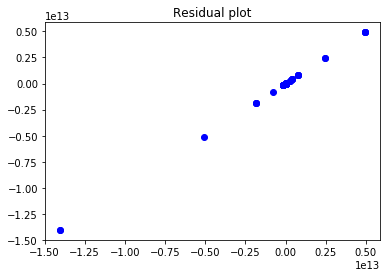

In [20]:
# residual plot
x_plot = plt.scatter(pred_cv, (pred_cv - y_cv), c='b')

plt.hlines(y=0, xmin= -1000, xmax=5000)

plt.title('Residual plot')

In [21]:
# see a funnel like shape in the plot. This shape indicates Heteroskedasticity. The presence of non-constant variance in the error terms results in heteroskedasticity. 

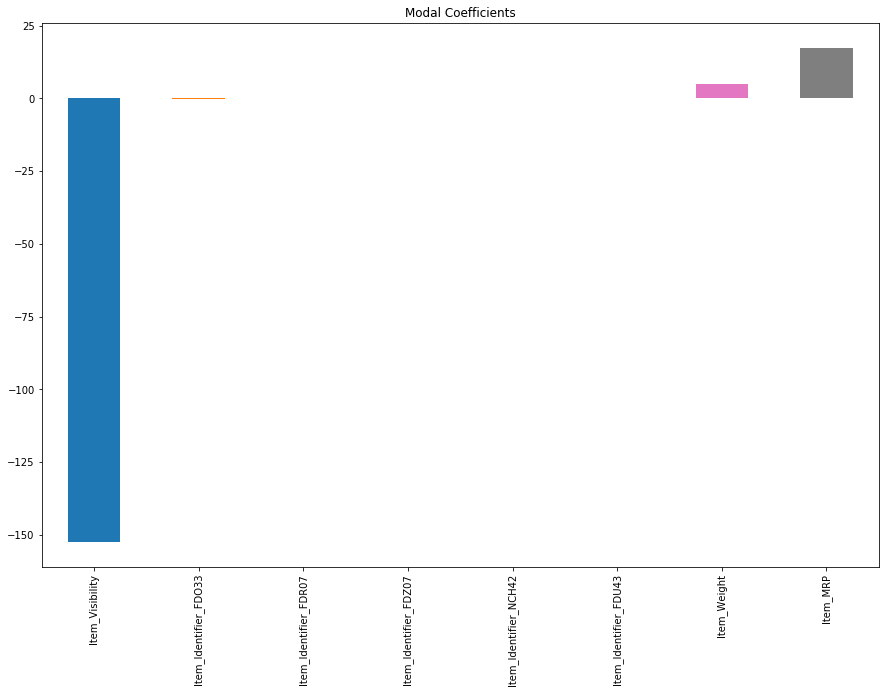

In [22]:
#checking the magnitude of coefficients

predictors = x_train.columns

coef = Series(lreg.coef_,predictors).sort_values()

coef[(coef > -1000) & (coef<1000)].plot(kind='bar', title='Modal Coefficients', figsize = (15,10))

In [23]:
coef[(coef > -1000) & (coef<1000)]

Item_Visibility         -1.524016e+02
Item_Identifier_FDO33   -1.143799e-01
Item_Identifier_FDR07   -5.002221e-12
Item_Identifier_FDZ07   -1.136868e-13
Item_Identifier_NCH42    1.705303e-13
Item_Identifier_FDU43    6.821210e-13
Item_Weight              4.877718e+00
Item_MRP                 1.747679e+01
dtype: float64

In [24]:
# so higher coeffecints willaffect the outcome more as compared to others


In [25]:
# Ridge Regression: lets see regularization method to reduce magnitude of the coefficents: 
from sklearn.linear_model import Ridge

## training the model

ridgeReg = Ridge(alpha=0.05, normalize=True)

ridgeReg.fit(x_train,y_train)

pred = ridgeReg.predict(x_cv)

#calculating mse

mse = np.mean((pred_cv - y_cv)**2)

print ("mse :", mse)
## calculating score 
print (ridgeReg.score(x_cv,y_cv))

mse : 2.1234324982006118e+23
0.41842579665499535


In [26]:
# here alpha is hyper parameter set manually. as we increase the value of alpha, the magnitude of the coefficients decreases, where the values reaches to zero but not absolute zero.
# But if you calculate R-square for each alpha, we will see that the value of R-square will be maximum at alpha=0.05. 

In [ ]:
# Lasso Regresssion:
from sklearn.linear_model import Lasso

lassoReg = Lasso(alpha=0.3, normalize=True)

lassoReg.fit(x_train,y_train)

pred = lassoReg.predict(x_cv)

# calculating mse

mse = np.mean((pred_cv - y_cv)**2)

print ("mse:", mse)

print ("R-square Score", lassoReg.score(x_cv,y_cv))

mse: 2.1234324982006118e+23
R-square Score 0.5418934578186717


We can see that as we increased the value of alpha, coefficients were approaching towards zero, but if you see in case of lasso, even at smaller alpha’s, our coefficients are reducing to absolute zeroes. Therefore, lasso selects the only some feature while reduces the coefficients of others to zero. This property is known as feature selection and which is absent in case of ridge.

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(frame = train)

In [ ]:
plt.jointplot(train['tem_Outlet_Sales'], train['Item_MRP'])